In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import requests
import zipfile
from tqdm import tqdm
import shutil
import os
import pandas as pd

In [2]:
ANOMALY_ARCHIVE_URI = r'https://www.cs.ucr.edu/~eamonn/time_series_data_2018/UCR_TimeSeriesAnomalyDatasets2021.zip'

In [3]:
def download_file(filename:str, directory: str, source_url: str, decompress: bool = False) -> None:
    """Download data from source_ulr inside directory.
    Parameters
    ----------
    filename: str
        Name of file
    directory: str, Path
        Custom directory where data will be downloaded.
    source_url: str
        URL where data is hosted.
    decompress: bool
        Wheter decompress downloaded file. Default False.
    """
    if isinstance(directory, str):
        directory = Path(directory)
    directory.mkdir(parents=True, exist_ok=True)

    filepath = Path(f'{directory}/{filename}')

    # Streaming, so we can iterate over the response.
    headers = {'User-Agent': 'Mozilla/5.0'}
    r = requests.get(source_url, stream=True, headers=headers)
    # Total size in bytes.
    total_size = int(r.headers.get('content-length', 0))
    block_size = 1024 #1 Kibibyte

    t = tqdm(total=total_size, unit='iB', unit_scale=True)
    with open(filepath, 'wb') as f:
        for data in r.iter_content(block_size):
            t.update(len(data))
            f.write(data)
            f.flush()
    t.close()

    size = filepath.stat().st_size

    if decompress:
        if '.zip' in filepath.suffix:
            with zipfile.ZipFile(filepath, 'r') as zip_ref:
                zip_ref.extractall(directory)
        else:
            from patoolib import extract_archive
            extract_archive(str(filepath), outdir=directory)

In [4]:
root_dir='.'

In [5]:
# download_file(filename=f'AnomalyArchive',
#             directory=root_dir,
#             source_url=ANOMALY_ARCHIVE_URI, 
#             decompress=True)

# # Reorganising the data
# shutil.move(src=f'{root_dir}/AnomalyDatasets_2021/UCR_TimeSeriesAnomalyDatasets2021/FilesAreInHere/UCR_Anomaly_FullData', 
#             dst=root_dir) 
# os.remove(os.path.join(root_dir, 'AnomalyArchive'))
# shutil.rmtree(os.path.join(root_dir, 'AnomalyDatasets_2021'))
# shutil.move(src=f'{root_dir}/UCR_Anomaly_FullData', 
#             dst=f'{root_dir}/AnomalyArchive') 

In [6]:
ANOMALY_ARCHIVE_ENTITIES = os.listdir(os.path.join(root_dir, 'AnomalyArchive'))
ANOMALY_ARCHIVE_ENTITIES = sorted(ANOMALY_ARCHIVE_ENTITIES)

In [32]:
data = pd.read_csv(f'{root_dir}/AnomalyArchive/{ANOMALY_ARCHIVE_ENTITIES[153]}', header=None)
data.columns = ['y']
data.head()

,y
0,117.4
1,139.1
2,128.0
3,127.0
4,122.8


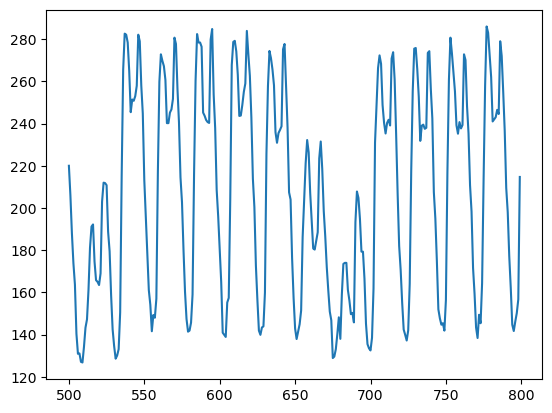

In [33]:
#i = 1000
plt.plot(data['y'][500:800])